# Visualizing FordGoBike Data


## Preliminary Wrangling

> Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.
In this project, I will perform an exploratory analysis on data provided by Ford GoBike, a bike-share system provider.

In [1]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

%matplotlib inline

In [ ]:
folder_name_of_csvs = 'trip_data_files'

In [ ]:
# This is going to take some time to run [5 minutes]
makedirs(folder_name_of_csvs)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name_of_csvs))
for month in range(1,12):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [4]:
# Combine All Locally Saved CSVs into One DataFrame
list_csvs = []
for file_name in listdir(folder_name_of_csvs):
    list_csvs.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
df = pd.concat(list_csvs)

In [5]:
# Saving it into a new master file
df.to_csv('master_file.csv')

In [2]:
df = pd.read_csv('master_file.csv')

## Assessing Data

In [3]:
df.shape

(2252058, 18)

In [8]:
# Randomly displaying 5 columns for detecting errors in dataframe
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1710838,172752,NaN,3443,No,617,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-08-03 17:55:29.6960,1980.0,Male,100.0,37.767100,-122.410662,Bryant St at 15th St,2018-08-03 17:45:12.0070,Subscriber
259047,259047,259047.0,2919,NaN,1076,10.0,37.795393,-122.404770,Washington St at Kearny St,2017-10-10 08:31:24.3770,1979.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-10-10 08:13:27.4850,Customer
1817734,87486,NaN,2210,No,929,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2018-09-17 17:27:13.3160,1995.0,Female,104.0,37.767045,-122.390833,4th St at 16th St,2018-09-17 17:11:43.8470,Subscriber
2138061,20138,NaN,2831,No,118,124.0,37.760447,-122.410807,19th St at Florida St,2018-11-26 19:59:34.3170,1975.0,Male,112.0,37.763847,-122.413004,Harrison St at 17th St,2018-11-26 19:57:36.0030,Subscriber
1949612,33147,NaN,2263,No,527,158.0,37.833279,-122.263490,Shattuck Ave at Telegraph Ave,2018-10-26 12:55:19.9960,1953.0,Female,171.0,37.844279,-122.251900,Rockridge BART Station,2018-10-26 12:46:32.5500,Subscriber


In [9]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252058 entries, 0 to 2252057
Data columns (total 18 columns):
Unnamed: 0                 2252058 non-null int64
Unnamed: 0.1               519700 non-null float64
bike_id                    2252058 non-null int64
bike_share_for_all_trip    1732358 non-null object
duration_sec               2252058 non-null int64
end_station_id             2240479 non-null float64
end_station_latitude       2252058 non-null float64
end_station_longitude      2252058 non-null float64
end_station_name           2240479 non-null object
end_time                   2252058 non-null object
member_birth_year          2079810 non-null float64
member_gender              2080240 non-null object
start_station_id           2240479 non-null float64
start_station_latitude     2252058 non-null float64
start_station_longitude    2252058 non-null float64
start_station_name         2240479 non-null object
start_time                 2252058 non-null object
user_type       

In [11]:
df.isnull().sum()

Unnamed: 0                       0
Unnamed: 0.1               1732358
bike_id                          0
bike_share_for_all_trip     519700
duration_sec                     0
end_station_id               11579
end_station_latitude             0
end_station_longitude            0
end_station_name             11579
end_time                         0
member_birth_year           172248
member_gender               171818
start_station_id             11579
start_station_latitude           0
start_station_longitude          0
start_station_name           11579
start_time                       0
user_type                        0
dtype: int64

In [12]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,2.252058e+06,519700.000000,2.252058e+06,2.252058e+06,2.240479e+06,2.252058e+06,2.252058e+06,2.079810e+06,2.240479e+06,2.252058e+06,2.252058e+06
mean,1.244267e+05,259849.500000,2.101589e+03,9.181335e+02,1.114495e+02,3.776810e+01,-1.223520e+02,1.982467e+03,1.132275e+02,3.776797e+01,-1.223525e+02
std,1.133429e+05,150024.611786,1.195229e+03,2.686599e+03,9.702559e+01,1.014484e-01,1.556892e-01,1.051074e+01,9.713899e+01,1.015587e-01,1.560933e-01
min,0.000000e+00,0.000000,1.000000e+01,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,1.881000e+03,3.000000e+00,3.726331e+01,-1.224737e+02
25%,4.691700e+04,129924.750000,1.098000e+03,3.580000e+02,2.800000e+01,3.777166e+01,-1.224094e+02,1.977000e+03,3.000000e+01,3.777143e+01,-1.224114e+02
50%,9.383500e+04,259849.500000,2.131000e+03,5.660000e+02,8.100000e+01,3.778175e+01,-1.223971e+02,1.985000e+03,8.100000e+01,3.778127e+01,-1.223974e+02
75%,1.586908e+05,389774.250000,3.059000e+03,8.880000e+02,1.790000e+02,3.779539e+01,-1.222948e+02,1.990000e+03,1.800000e+02,3.779539e+01,-1.222948e+02
max,5.196990e+05,519699.000000,4.466000e+03,8.636900e+04,3.810000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.810000e+02,4.551000e+01,-7.357000e+01


In [13]:
# Checking for any duplicated values
df.duplicated().any()

False

In [14]:
df['member_gender'].value_counts()

Male      1541528
Female     507383
Other       31329
Name: member_gender, dtype: int64

In [15]:
df['user_type'].value_counts()

Subscriber    1878472
Customer       373586
Name: user_type, dtype: int64

## Data Cleaning

Before assessing the data to draw conclusions, there are some quality issues that needs cleaning:


><li> The following columns bike_id, start_station_id, end_station_id  should be in object format.
 <li> The end_time, start_time columns should be in datetime format instead of object.
 <li> The user_type, member_gender columns should be in category format instead of string.
 <li> Additionally, we can calculate the age of the user by the help of member_birth_year column
 <li> Furthermore, we can extract daysofweek, hours for further investigation.
 <li> A new column duration_min is also added to know the duration of the trip in minutes.
 <li> The member birth year has dates prior to 1900.
     
    

In [3]:
# First creating a copy of the dataframe
df_clean = df.copy()

##### Define/Clean/Test

**Define**: Removing the age outlyers from member_birth_year column (All ages before 1920 are considered outlyers) 

In [4]:
age_outlyer = df[df_clean['member_birth_year'] < 1920]
age_outlyer['member_birth_year']

287        1900.0
1751       1900.0
3119       1900.0
3259       1900.0
5246       1900.0
7183       1902.0
8077       1902.0
9838       1900.0
10712      1900.0
13035      1900.0
14779      1900.0
15146      1902.0
15948      1900.0
16001      1900.0
16466      1902.0
16977      1902.0
18074      1900.0
18367      1902.0
19981      1902.0
20347      1902.0
21678      1900.0
21905      1900.0
25809      1902.0
25878      1902.0
27538      1902.0
27566      1902.0
29217      1911.0
30955      1900.0
32557      1900.0
32586      1900.0
            ...  
2151600    1900.0
2155938    1900.0
2157099    1900.0
2159912    1900.0
2160108    1900.0
2161512    1900.0
2164080    1900.0
2167734    1900.0
2167887    1900.0
2168280    1911.0
2169497    1911.0
2176022    1902.0
2178595    1900.0
2181808    1902.0
2185099    1900.0
2185495    1900.0
2190591    1900.0
2196140    1902.0
2198657    1902.0
2200984    1900.0
2211132    1902.0
2215938    1900.0
2224002    1900.0
2224536    1900.0
2230353   

In [5]:
# Member birth years before 1920 are also included
df_clean['member_birth_year'].min()

1881.0

**Coding:**

In [6]:
df_clean = df_clean.query('member_birth_year >= 1920')

**Testing:**

In [7]:
# The minimum birth_year we have is 1920
df_clean['member_birth_year'].min()

1920.0

**Define:** Converting several columns to string format

**Coding:**

In [8]:
# converting to string using astype()
df_clean['bike_id'] = df_clean['bike_id'].astype('str')
df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')

**Testing:**

In [9]:
# Testing to see converted successfully or not
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078332 entries, 0 to 2252057
Data columns (total 18 columns):
Unnamed: 0                 int64
Unnamed: 0.1               float64
bike_id                    object
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(10)
memory usage: 301.3+ MB


**Define:** Converting end_time, start_time to datetime format instead of object.

**Code:**

In [10]:
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])

**Testing:**

In [11]:
# Testing to see it works or not
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078332 entries, 0 to 2252057
Data columns (total 18 columns):
Unnamed: 0                 int64
Unnamed: 0.1               float64
bike_id                    object
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              object
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
dtypes: datetime64[ns](2), float64(6), int64(2), object(8)
memory usage: 301.3+ MB


**Define:** Converting user_type, member_gender columns into category format.

**Code:**

In [12]:
# Converting into category format
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

**Testing:**

In [13]:
df_clean['user_type'].dtype, df_clean['member_gender'].dtype

(CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False),
 CategoricalDtype(categories=['Female', 'Male', 'Other'], ordered=False))

**Define:** Calculating the age from birth_year column

**Code:**

In [14]:
df_clean['member_age'] = 2020-df_clean['member_birth_year']

**Testing:**

In [15]:
# Testing to check members_age column
df_clean.sample(5)

,Unnamed: 0,Unnamed: 0.1,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
165017,165017,165017.0,2513,NaN,585,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-11-06 08:39:24.778,1988.0,Male,33.0,37.781650,-122.415408,Golden Gate Ave at Hyde St,2017-11-06 08:29:39.722,Subscriber,32.0
2202235,84312,NaN,1060,No,236,16.0,37.794130,-122.394430,Steuart St at Market St,2018-11-08 17:52:52.173,1974.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-11-08 17:48:55.192,Subscriber,46.0
1542676,4590,NaN,142,No,162,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2018-08-31 09:25:06.741,1990.0,Male,253.0,37.866418,-122.253799,Haste St at College Ave,2018-08-31 09:22:24.035,Subscriber,30.0
1253856,110960,NaN,2313,No,848,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-06-14 09:14:36.682,1966.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-06-14 09:00:28.072,Subscriber,54.0
1383942,45078,NaN,1310,No,931,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2018-07-25 07:35:06.546,1979.0,Male,121.0,37.759210,-122.421339,Mission Playground,2018-07-25 07:19:35.294,Subscriber,41.0


**Define:** Adding columns for the start_time_month, start_time_month_number, start_time_hour along with figuring out the trip duration in minutes.

**Coding:**

In [16]:
# In order for dt.strftime() to work the datatype should be datetime 

# Extracting start time month's name (Jan-Dec)
df_clean['start_time_month']= df_clean['start_time'].dt.strftime('%B')

In [17]:
# Extract start time month's number (1-12)
df_clean['start_time_month_number']= df_clean['start_time'].dt.month.astype(int)

In [18]:
# Extracting start time weekdays (Mon-Sun)
df_clean['start_time_weekday']= df_clean['start_time'].dt.strftime('%a')

In [19]:
# Extracting Start and End time hour [using dt.hour]
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

In [20]:
# Calculating the trip duration in minutes
df_clean['duration_min'] = df_clean['duration_sec'] / 60

# Converting duration_min into integer
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

**Testing:**

In [21]:
df_clean.sample(5)

,Unnamed: 0,Unnamed: 0.1,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,...,start_station_name,start_time,user_type,member_age,start_time_month,start_time_month_number,start_time_weekday,start_time_hour,end_time_hour,duration_min
2220389,102466,NaN,3267,No,1982,187.0,37.796248,-122.279352,Jack London Square,2018-11-06 09:19:46.689,...,Telegraph Ave at Carleton St,2018-11-06 08:46:44.426,Subscriber,27.0,November,11,Tue,8,9,33
840926,8324,NaN,3878,No,2182,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-04-29 13:12:43.720,...,24th St at Chattanooga St,2018-04-29 12:36:20.919,Customer,30.0,April,4,Sun,12,13,36
167641,167641,167641.0,2920,NaN,611,133.0,37.755213,-122.420975,Valencia St at 22nd St,2017-11-05 09:23:13.149,...,Eureka Valley Recreation Center,2017-11-05 09:13:01.284,Customer,42.0,November,11,Sun,9,9,10
352446,352446,352446.0,51,NaN,125,278.0,37.331932,-121.904888,The Alameda at Bush St,2017-09-13 09:30:31.466,...,Cahill Park,2017-09-13 09:28:26.232,Subscriber,35.0,September,9,Wed,9,9,2
2103661,187196,NaN,238,No,1209,157.0,37.846784,-122.291376,65th St at Hollis St,2018-10-02 21:25:01.314,...,West Oakland BART Station,2018-10-02 21:04:51.969,Subscriber,27.0,October,10,Tue,21,21,20


### Storing The Data


In [22]:
# Saving the cleaned data
df_clean.to_csv('clean_master_file.csv', index=False)

In [24]:
df_clean.shape

(2078332, 25)

> *The DataFrame size after cleaning has reduced from 2252058 to 2078332*

### What is the structure of your dataset?

> The dataset has approximately 2078332 bike rides in this dataset. The dataset has some important features which are listed below.
Each trip is anonymized and includes:

**Trip info**
<li>Trip Duration (seconds)
<li>Start Time and Date
<li>End Time and Date
    
    
**Station info**
<li>Start Station ID
<li>Start Station Name
<li>Start Station Latitude
<li>Start Station Longitude
<li>End Station ID
<li>End Station Name
<li>End Station Latitude
<li>End Station Longitude
    

**Member info** 
<li>Bike ID
<li>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) 





Apart from these columns, some new columns were also introduced which includes:


 <li>member_age 
 <li>duration_min
 <li>start_time_month
 <li>start_time_month_number
 <li>start_time_weekday
 <li>start_time_hour
 <li>end_time_hour

### What is/are the main feature(s) of interest in your dataset?

> 1. Firstly, I'm interested to see at what time bikes are high in demand (during the day/weekday/month).
2. I'm also interested in knowing which genders rented bikes the most and which gender rented for most time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

-The customers age is an important feature of interest which will help in my investigation.
    
-Rental Time, Month, Day are also important factors which will be considered in the investigation.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [25]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

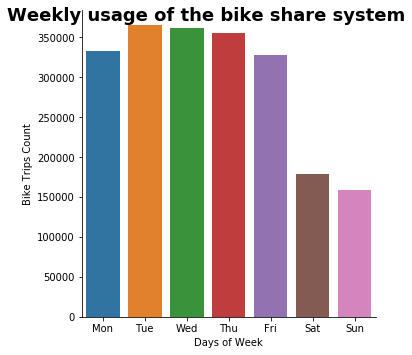

In [26]:
cplot = sns.catplot(data=df_clean, kind='count', x='start_time_weekday',  order = weekday)
cplot.set_axis_labels("Days of Week", "Bike Trips Count")
cplot.fig.suptitle('Weekly usage of the bike share system', fontsize=18, fontweight='bold');

The bike system is used most frequently on **Tuesday**

In [27]:
# Setting the color to default color from color_palette() function
default_color = sns.color_palette()[0]            # 0 index is blue color, 1 index is different color and so on

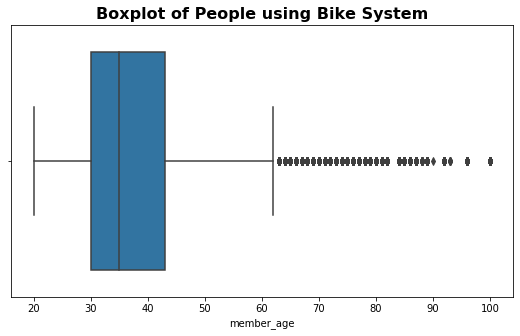

In [28]:
plt.figure(figsize = [9, 5])
bplot = sns.boxplot(data=df_clean, x='member_age', color=default_color, orient = 'h');
plt.title("Boxplot of People using Bike System", fontsize=16, fontweight='bold');

The box plot for age shows us that mostly the people who use the Bike system have ages between **30-45 years**.

<Figure size 864x504 with 0 Axes>

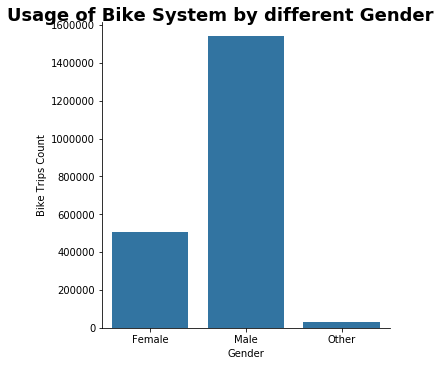

In [31]:
plt.figure(figsize = [12, 7])
cplot = sns.catplot(data=df_clean, x='member_gender', kind='count', color=default_color);
cplot.set_axis_labels("Gender", "Bike Trips Count");
cplot.fig.suptitle('Usage of Bike System by different Gender', fontsize=18, fontweight='bold', y=1.01);

The Bike System is mostly used by the **Male** gender. It can be clearly seen from this barchart that males use the Bike system approximately **3 times more**, as compared to *Females.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

After removing the age outlyers from the dataset (all ages greater than 100 are considered as outlyers), I checked each variables like monthly, weekly, and hourly trend of Bike sharing system with respect to their genders and also with respect to the user_type. All these calculations and visualizations are necessary to get a deeper understanding of this dataset. After viewing the graphs, I observed that bikes are in high demand between October and September, probably because of cold season people prefer to ride on bikes. Secondly, in weekdays people use the Bike system more frequently as compared to weekends and the peak hours when Bike system is most commonly used is 8-9 and 18-19, hence this means the bike system is used mainly around 8-9am (in the morning) and 5-6pm (when people are coming back from work).

Furthermore, I observed that gender plays an important role in this dataset because males are using this Bike system approximately 3 times more as compared to women.

Lastly, the Subscribers users are using the bike system much more frequently as compared to the Customer user type.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was one unusual distribution, where the member_birth_year column had birth years dated back to 1900, which is realistically not possible so I removed the outlyers (ages greater than 100) and filtered the dataset accordingly. Secondly, I also created new columns for my ease, by calculating age of members, weekdays, months, hours etc. Lastly, I changed the datatypes of columns to the appropriate ones for calculation.

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in our
data.

## Weekly usage of the bike share system by Different Users

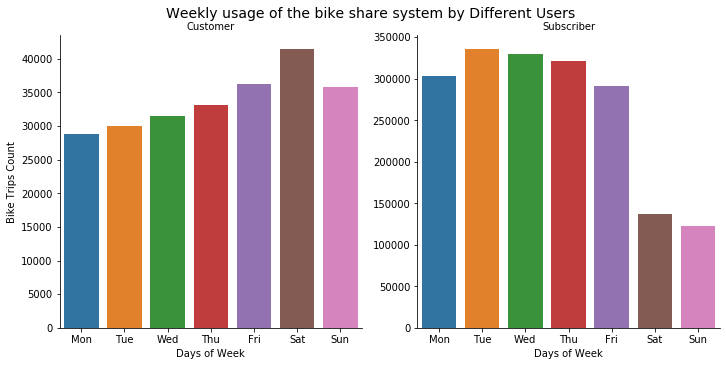

In [32]:
cplot = sns.catplot(data=df_clean, sharey=False, x='start_time_weekday', order = weekday, col='user_type', kind='count')
cplot.set_axis_labels("Days of Week", "Bike Trips Count")

# This will automatically name after columns 
cplot.set_titles("{col_name}")
cplot.fig.suptitle('Weekly usage of the bike share system by Different Users', fontsize=14, y=1.01);

**These graph helps us to identify the difference in bike rents between *Customer* and *Subsciber* user types. Through this, we can see that Customers use the bike sharing system more frequently and usually on weekends including Saturday, Sunday, while the Subscribers use it mostly on businessdays to go to their work or school etc.**

## Violin Plot of Ages of Different Users

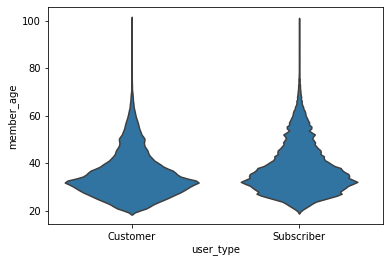

In [33]:
sns.violinplot(data = df_clean,x = 'user_type', y='member_age', color = sns.color_palette()[0], inner=None);

**There is not such a significant age difference between different Customer group and Subscriber group, as evident from Violin Plot**

## Violin Plot for different genders vs Age

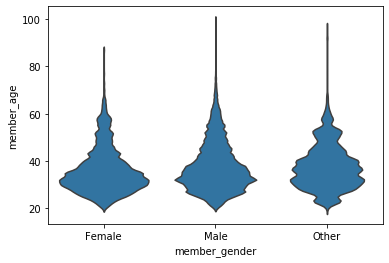

In [34]:
sns.violinplot(data = df_clean, x = 'member_gender',y='member_age',color = sns.color_palette()[0],inner=None);

**1. Males tend to use the bike service most frequently, especially the older ones**

**2. Young females (25-35 years) tend to use bikes more frequently as compared to males, and others**

## Average Trip Duration (in minutes) of Different User Groups

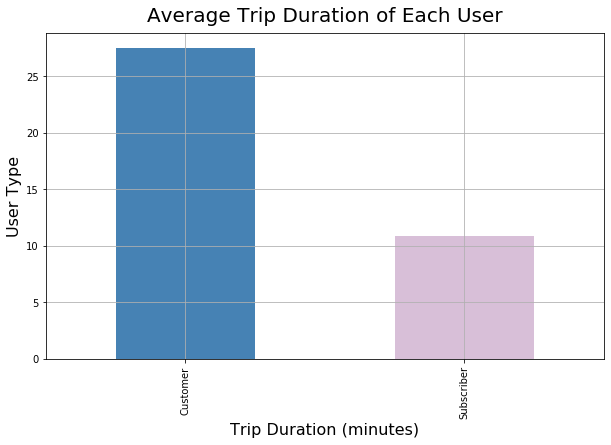

In [218]:
colors=['steelblue', 'thistle']
axis = df_clean.groupby('user_type')['duration_min'].mean().plot(kind='bar', color=colors, figsize=(10,6))
axis.set_title('Average Trip Duration of Each User', fontsize=20, y=1.015)
axis.set_ylabel('User Type',  fontsize=16)
axis.grid()         # To add gridlines
axis.set_xlabel('Trip Duration (minutes)', fontsize=16);

**1. From this graph, we can see that Customers average trip duration is approximately 27 minutes**

**2. Secondly, Subscribers average trip duration is approximately 11 minutes.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> After observing the above graphs some interesting facts were revealed about the data. Subscribers used the Bike System 88.6% since they are regular users who use Bike Sharing system for daily commutes, while the Customers used the Bike System for only 11.4% of the time, most probably for their leisure activities. After observing the trend for different users, we observe that Subscribers used the Bike system mostly at (8-9am) and (5-6pm), where as Customers used it mostly after 6pm. We also observed that mostly old males use this bike system, as compared to other genders. Also, young females (around 25-35 years old) use this bike system more frequently than males, and other gender. One important insight which we revealed was that different user groups have different Average trip duration time, where Customers use it for approximately 27 minutes (since they use it for recreational purposes), and Subscribers use it for approximately 11 minutes (since they use it to go to work, or home).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that there is a difference in average trip duration between customers and subscribers. Customers trip are mostly longer than subscribers, mainly because they use it for fun, leisure purpose, where as Subscribers use it mainly for commute purposes so they prefer quick rides to reach work/home.

## Multivariate Exploration

> Now we will create plots of three or more variables to investigate our data even
further. 

## Heatmap between Different Genders, Different Users and Duration of Trip (in minutes)

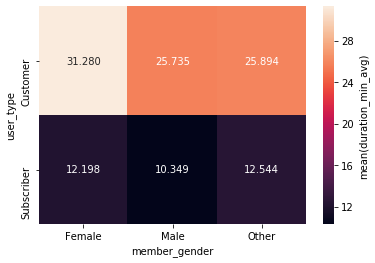

In [46]:
mean_gender_duration = df_clean.groupby(['member_gender', 'user_type']).mean()['duration_min']
mean_gender_duration = mean_gender_duration.reset_index(name = 'duration_min_avg')
mean_gender_duration = mean_gender_duration.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'duration_min_avg')

sns.heatmap(mean_gender_duration, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min_avg)'});

**This heatmap shows an interesting feature that Females overall have higher trip duration (in minutes) than Males. Females have the highest duration of trip (in minutes) that is 31.28 minutes.**

**Moreover, it also strengthens our claim that Customers mean duration(in min) is close to 27 minutes and Subscribers mean duration(in min) is close to 11 minutes, as previously stated from our previous Bi-variate Analysis. This is quite evident from this heatmap as it strenghthens our previous findings**

## Trip duration by Different Users with Different Genders

In [43]:
# Removing the outlyers from duration_sec
df_clean = df_clean.query('duration_sec < 3800')

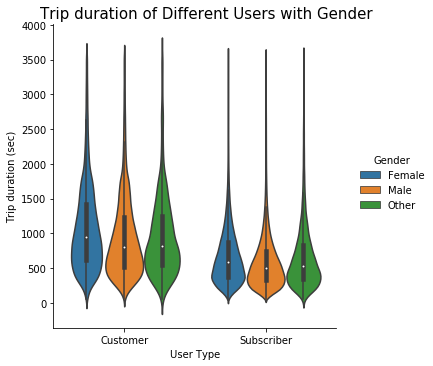

In [48]:
cplot = sns.catplot(data=df_clean, x='user_type', y="duration_sec", hue="member_gender", kind="violin")
cplot._legend.set_title('Gender')
cplot.set_axis_labels("User Type", "Trip duration (sec)")
cplot.fig.suptitle('Trip duration of Different Users with Gender', y=1.01, fontsize=15);

In this Violinplot, we can see that the Gender **Women** in both the user types have a longer trip duration(in sec). Also, this multivariate analysis strengthens our previous claim that Customers have a **much longer** trip duration than the Subscriber category.

## Weekly usage of the bike share system by Different Users with Genders

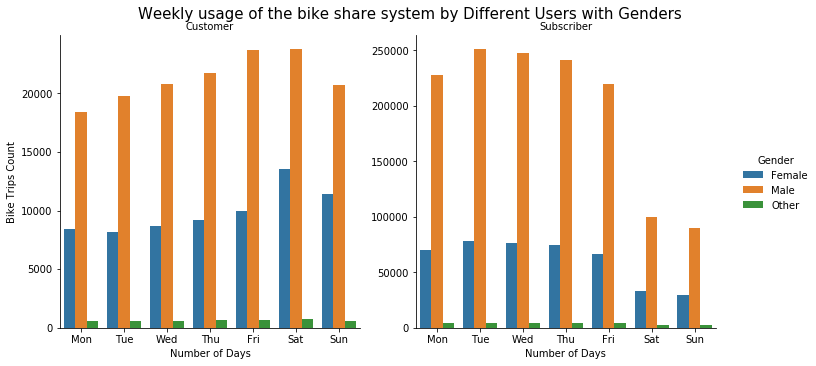

In [47]:
cplot = sns.catplot(data=df_clean, kind='count', x='start_time_weekday', col="user_type", hue='member_gender',order = weekday,
                sharey=False)
cplot._legend.set_title('Gender')
cplot.set_axis_labels("Number of Days", "Bike Trips Count")
cplot.set_titles("{col_name}")
cplot.fig.suptitle('Weekly usage of the bike share system by Different Users with Genders', y=1.01, fontsize=15);

**This graph clearly shows that Subscribers use the bike system more frequently on business days, while the Customers use the bike system more frequently on weekdays. One more important thing to note is that in both types of users the usage of bike system of males is approximately twice of females. This is quite evident from the above graph.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Multivariate Analysis revealed and strengthened that **Customer** users have a **much longer trip duration (in seconds)** as compared to the Subscriber users, this is because Customer users are using this Bike service system on **weekends (Saturday,Sunday)** for fun, and as a sport activity, hence they are able to dedicate lots of time to it, where as Subscribers use it on **businessdays mostly (for going to and back from work)**.

### Were there any interesting or surprising interactions between features?

> Plotting a heatmap with duration of bike (in minutes) between Different Genders and Different Users revealed a surprising new thing about the customers, it revealed that *Females* overall have **higher trip duration (in minutes)** than Males, and Other genders. Also, one important thing was noted that on weekends Customer group is using the Bike system more frequently as compared to regular Subscribers.